In [1]:
%matplotlib notebook

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pyflow
from pyflow.potential import MurmanCole
from pyflow.potential import CircularAirfoil

# Full Potential Equation

If the flow is irrotational, $\nabla \times \mathbf{u} = 0$, then the governing equations of the fluid dynamics can be determined by a potential function. Starting with the steady Euler equations, 

$$
\begin{align}
& \nabla \cdot (\rho \mathbf{u}) = 0 \\
& \rho \mathbf{u} \cdot \nabla \mathbf{u} = -\nabla p 
\end{align}
$$

Using the above definition, 

$$
\begin{align}
& \mathbf{u} \cdot \nabla \rho + \rho \nabla \cdot \mathbf{u} = 0 \\
& \rho \left( \mathbf{u} \cdot \nabla \right) \mathbf{u} = -a^2 \nabla \rho
\end{align}
$$

Multiplying the momentum equation with the velocity vector, 

$$
\mathbf{u} \cdot \left( \rho \left( \mathbf{u} \cdot \nabla \right) \mathbf{u}\right) = a^2 \mathbf{u} \cdot \nabla \rho
$$

and then using the mass conservation equation, 

$$
\rho \left( \mathbf{u} \cdot \left( \mathbf{u} \cdot \nabla\right) \mathbf{u}  \right) = a^2 \rho \nabla \cdot \mathbf{u}
$$

Dividing by the density, and the rearranging

$$
\nabla \cdot \mathbf{u} - \frac{ \mathbf{u} \cdot \left( \mathbf{u} \cdot \nabla\right) }{a^2} \mathbf{u} = 0 
$$

Using the definition of the potential, $\mathbf{u} = \nabla \phi$, we get the following

$$
\nabla^2 \phi - \frac{ \nabla \phi \cdot \left( \nabla \phi \cdot \nabla\right) }{a^2} \nabla \phi = 0 
$$

If $a$ is the speed of sound, then we can define a local Mach number vector as

$$
\mathbf{M} = \frac{\mathbf{u}}{a} = \frac{1}{a} \nabla \phi
$$


Using this definition, 

$$
\nabla^2 \phi - \mathbf{M} \cdot \left( \mathbf{M} \cdot \nabla\right) \nabla \phi = 0 
$$


$$
\nabla \times \mathbf{u} = \nabla \times \left( \nabla \phi \right) = 0
$$

where in Cartesian coordinates, the velocity vector is given by the gradient of the potential, $\phi$, 

$$
\mathbf{u} = \nabla \phi = \left[ \frac{\partial \phi}{\partial x} \, , \frac{\partial \phi}{\partial y} \, , \frac{\partial \phi}{\partial z} \right]
$$



## Linearization of the potential equation

In two-dimensions, the full potential equation is written as

$$
(a^2 - \phi_x^2)\phi_{xx} - 2 \phi_x \phi_y \phi_{xy} +
(a^2 - \phi_y^2)\phi_{yy} = 0
$$

where

$$
\phi_x = \frac{\partial \phi}{\partial x} \,\, \textrm{and} \,\,
\phi_{xx} = \frac{\partial^2 \phi}{\partial x^2}
$$

Let us assume the freestream flow is uniform and steady and the flow conditions are defined by $M_{\infty}$, $a_{\infty}$, $\rho_{\infty}$, etc. Now consider what happens to the flow when the gas moves over a slender object. If the disturbance or pertubation of the flow is small, then we can simplify our governing equations. We assume that velocity components are perturbed by $\hat{u}$ and $\hat{v}$, such that

$$
\begin{align}
&u = u_{\infty} + \hat{u} \\
&v = \hat{v}
\end{align}
$$

where 

$$
\frac{\hat{u}}{u_{\infty}} << 1
$$

Using the definition of the potential, 

$$
\hat{u} = \frac{\partial \hat{\phi}}{\partial x} = \hat{\phi}_x
\,\, \textrm{and} \,\, \hat{v} = \hat{\phi}_y
$$

which results in 

$$
\begin{align}
&u = u_{\infty} + \hat{\phi}_x \\
&v = \hat{v}
\end{align}
$$

or in terms of the potential $(\phi_{\infty} = u_{\infty}x)$,

$$
\begin{align}
&\phi_x = u_{\infty} + \hat{\phi}_x \\
&\phi_y = \hat{\phi}_y
\end{align}
$$

The second derivatives of the potential are

$$
\begin{align}
&\phi_{xx} = \hat{\phi}_{xx} \\
&\phi_{yy} = \hat{\phi}_{yy} \\
&\phi_{xy} = \hat{\phi}_{xy}
\end{align}
$$

Using these expressions, we get

$$
\Big( a^2 - (u_{\infty} + \hat{\phi}_x)^2 \Big) \hat{\phi}_{xx}  - 2 (u_{\infty} + \hat{\phi}_x) \hat{\phi}_y \hat{\phi}_{xy} +
(a^2 - \hat{\phi}_y^2)\hat{\phi}_{yy} = 0
$$

Since we require that $\hat{u}$ to be much less than $u_{\infty}$, terms like 

$$
\hat{\phi}_x^2, \,\,\, \hat{\phi}_y^2, \,\,\, \hat{\phi}_x\hat{\phi}_y
$$

are assumed to be negilible. Removing those terms from the above equation results in

$$
\Big( a^2 - (u_{\infty} + \hat{\phi}_x)^2 \Big) \hat{\phi}_{xx} +
a^2 \hat{\phi}_{yy} = 0
$$

$$
\Big( a^2 - u_{\infty}^2  - \hat{\phi}_x^2 - 2 u_{\infty}\hat{\phi}_x \Big)\hat{\phi}_{xx} +
a^2 \hat{\phi}_{yy} = 0
$$

and assuming $\hat{\phi}_x^2  << 1$, 

$$
\Big( a^2 - u_{\infty}^2 - 2 u_{\infty} \hat{\phi}_x \Big) \hat{\phi}_{xx} + a^2 \hat{\phi}_{yy} = 0
$$

With the assumption of isentropic flow, the energy equation can be written as

$$
\frac{u^2 + v^2}{2} + \frac{a^2}{\gamma - 1} = \frac{u^2_{\infty}}{2} + \frac{a^2_{\infty}}{\gamma - 1}
$$

which we can write as

$$
\frac{(u_{\infty} + \hat{u})^2 + \hat{v}^2}{2} + \frac{a^2}{\gamma - 1} = \frac{u^2_{\infty}}{2} + \frac{a^2_{\infty}}{\gamma - 1}
$$

and can be expanded as

$$
 \frac{a^2}{\gamma - 1} = \frac{u^2_{\infty}}{2} - \frac{u^2_{\infty} + \hat{u}^2 + 2u_{\infty}\hat{u} + \hat{v}^2}{2} + \frac{a^2_{\infty}}{\gamma - 1}
$$

simplifying

$$
a^2 = a^2_{\infty} - \left({\gamma - 1} \right)\frac{\hat{u}^2 + 2u_{\infty}\hat{u} + \hat{v}^2}{2}
$$

Since $\hat{u}^2$ and $\hat{v}^2$ are much smaller than one, we can assume they are negilible,

$$
a^2 = a^2_{\infty} - (\gamma -1) u_{\infty} \hat{\phi}_x
$$

Using this expression for $a^2$, let us plug it into the linearized potential equation, 

$$
\Big(a^2_{\infty} - (\gamma -1) u_{\infty} \hat{\phi}_x - u_{\infty}^2  - 2 u_{\infty} \hat{\phi}_x \Big) \hat{\phi}_{xx} +
\Big(a^2_{\infty} - (\gamma -1) u_{\infty} \hat{\phi}_x\Big) \hat{\phi}_{yy} = 0
$$

Assume

$$
\hat{\phi}_x \hat{\phi}_{yy} << 1
$$

which results in

$$
\Big(a^2_{\infty} - (\gamma -1) u_{\infty} \hat{\phi}_x - u_{\infty}^2  - 2 u_{\infty} \hat{\phi}_x \Big) \hat{\phi}_{xx} +
a^2_{\infty}  \hat{\phi}_{yy} = 0
$$

Dividing by $a_{\infty}^2$ and simplifying results in the transonic small distrubance equation is

$$
\left[ 1 - M^2_{\infty} - \left(\gamma + 1\right) M^2_{\infty} \frac{\hat{\phi}_x}{u_{\infty}} \right] \hat{\phi}_{xx} + \hat{\phi}_{yy} = 0
$$

$$
\rho \approx \rho_{\infty}\left(1 - M^2_{\infty}\left(\frac{u}{u_{\infty}} - 1\right)\right)
$$

$$
p \approx p_{\infty}\left(1 - \gamma M^2_{\infty}\left(\frac{u}{u_{\infty}} - 1\right)\right)
$$

$$
c_p = \frac{p - p_{\infty}}{\frac{1}{2}\rho_{\infty} u^2_{\infty}} \approx -2 \frac{\hat{u}}{u_{\infty}}
$$

As a result of the linearization, the transonic small distrubance equation describes the full around slender bodies, for larger distrubances, e.g., blunt-nosed airfoils, the full potential equations must be used. Both equations, however, assume the flow to be isentropic. The assumption of isentropic is that the flow is reversible, requiring only gradual changes in the thermodynamic quantities. As such the formation of a shock wave violates this assumption, since the flow is now irreversible.  

**Only weak shocks.** Strong shocks increase the entropy within the flow significantly, which would violate the assumption that the gas is isentropic. The isentropic equations are approximately valid to Mach numbers less than 1.3. 

# Model Elliptic Equation

The second-order partial differential equation

$$
A \phi_{xx} + \phi_{yy} = 0
$$

where $A > 0$ is classified as an elliptic PDE. Elliptic equations have no characteristic curves. For both hyperbolic and parabolic equations, information ("perturbations") travels along characteristic curves. As a result, for elliptic equations, there is no mathematical mechanism present to support the concept of information propagation. In physics, elliptic equations often describe equilibrium states or potentials, e.g., gravity, electrical, etc.


We also note that if $A < 0$, then the equation is hyperbolic. We should expect this, since in the transonic small perturbation equation, we have

$$
A =1 - M^2_{\infty} - \left(\gamma + 1\right) M^2_{\infty} \frac{\hat{\phi}_x}{u_{\infty}}
$$

which is less than one when the Mach number is greater than 1.



## Boundary conditions

Since the PDE is elliptic, we must specify a boundary condition for the far-field boundary of the domain. We will apply two different types of boundary condition. A Dirchilet boundary condition,

$$
\phi = \theta_{bdry}
$$

where the value of $\phi$ along the boundary is specified directly and held constant throughout the simulation. The other type of boundary condition is a von Neumann boundary condition,

$$
\frac{\partial \phi}{\partial n}\bigg\rvert_{bdry} = 0
$$

where the gradient of $\phi$ normal to the boundary is specified. Notice that for the potential equation, specifying the gradient is conceptually equivalent to specifying the velocity. At the surface, the velocity vector should be tangential to the body, or stated another way perpendicular to the normal vector of the body. Let the function $f(x,y)$ represent the curve of the surface, then we can construct a boundary condition from the requirement that

$$
\mathbf{u} \cdot \nabla f = 0
$$

which for $u=u_{\infty} + \hat{u}$ and $v=\hat{v}$ is 

$$
\Big(u_{\infty} + \hat{u}\Big) \frac{\partial f}{\partial x} + \hat{v}\frac{\partial f}{\partial y} = 0
$$

Since $u_{\infty} >> \hat{u}$, we can state

$$
\frac{\hat{v}}{u_{\infty}} \approx - \frac{\partial f / \partial x}{\partial f / \partial y} = -\frac{\textrm{d}y}{\textrm{d}x}
$$

Since the body must be "thin" in order for the perturbations to be small, then we can approximate the velocity perturbation using a Taylor series expansion about $y=0$, 

$$
\hat{v}(x,y) = \hat{v}(x,0) + \left(\frac{\partial \hat{v}}{\partial y}\right)\bigg\rvert_{y=0}y + \dots
$$

Assuming the gradient of the $\hat{v}$ is small at the body, 

$$
\frac{\partial \phi}{\partial y} = \hat{v}(x,y) = \hat{v}(x,0) = u_{\infty} \left( \frac{\textrm{d}y}{\textrm{d}x}\right)_{\textrm{body}}
$$

## Simulation Domain

The chord length is defined as $c$. We define the width and height of the domain as $L_x$ and $L_y$, respectively. Let us use, $L_x = 50c$ and $L_y = 50c$, where the airfoil is centered in domain along the $y=0$ boundary. Note that because we assume the airfoil is thin (small distrubance theory), then we do not need to use a body-fitted mesh. 

<img src="symmetric_arifoil.png" alt="symmetric_arifoil.png" width="500" height="600">


Even though we do not need to use a body-fitted mesh, we can visualize the circular arc airfoil using the following code.

<IPython.core.display.Javascript object>


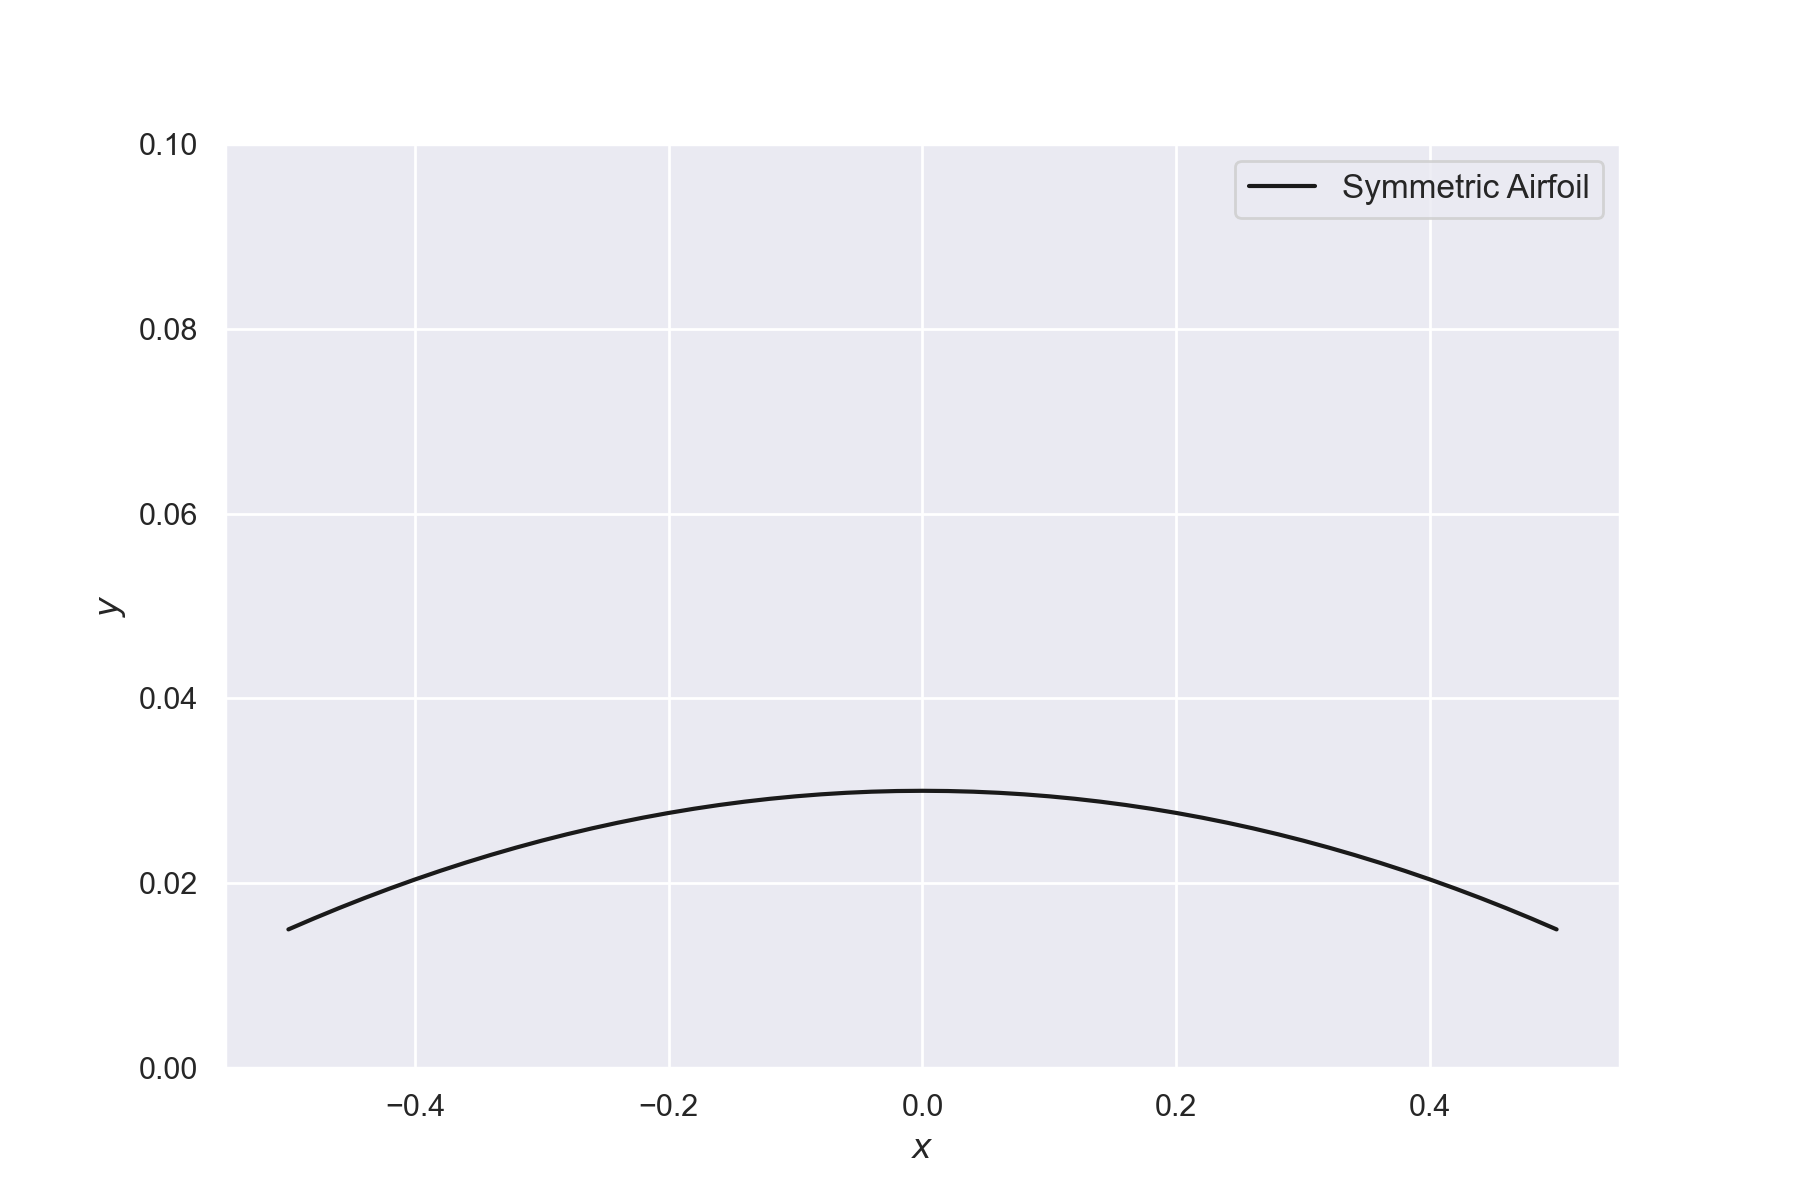

(0.0, 0.1)

In [2]:
mesh = CircularAirfoil(6, stretch_mesh=True, Nx=51, Ny=51)

xx, yy = mesh.plot_circular_arc()

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

line = ax.plot(xx, yy, c='k', ls='-', label="Symmetric Airfoil")

ax.legend(fontsize=12)
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)

ax.set_ylim((0,0.1))

### Two-dimensional Mesh

We will use a $N_x \times N_y$ mesh where $N_x = N_y = 51$. In the $x$-direction, the mesh is uniformally spaced across the chord of the airfoil using 21 points and then exponentially stretched to the left and right far-field boundaries $50c$ away. In the $y$-direction, the mesh is exponentially stretched to the top far-field boundary, also $50c$ away. 

The mesh spacing in the x-direction across the airfoil is 

$$
\Delta x = \frac{c}{N_{\textrm{chord}} - 1}
$$

where $N_{\textrm{chord}} = 21$. We will define the leading-edge of the airfoil as the origin of our simulation domain, thus we can state, 

$$
\Delta x = \frac{c}{N_{\textrm{chord}} - 1} \qquad \textrm{for} \, 0 \leq x \leq c
$$

For $x < 0$ and $x > c$, we will exponentially stretch the mesh using the remaining points. Let us evenally distribute the remaining points to the left and right and define

$$
N_{\textrm{flow}} = \frac{1}{2} \big(N_x - N_{\textrm{chord}} \big)
$$

For $N_x = 51$ and $N_{\textrm{chord}}$, $N_{\textrm{flow}} = 15$. We will use the following function to define the mesh size

$$
x_i - x_0 = \big( L_{\textrm{flow}} \big) \frac{e^{\kappa_x \left(\frac{i-1}{N_{\textrm{flow}}\,-\,1}\right)} - 1}{e^{\kappa_x} - 1}
$$

However, the parameter $\kappa_x$ is unknown, since all we are given is $L_{\textrm{flow}}$, $N_{\textrm{flow}}$, and $x_0$. To find a value of $\kappa_x$, we will specify a value for the minimum spacing, $\Delta x_{\textrm{min}}$, and then solve for $\kappa_x$.

For the $y$-direction, we use the same exponential stretching function,

$$
y_i - y_0 = \big( L_y \big) \frac{e^{\kappa_y \left(\frac{i-1}{N_y\,-\,1}\right)} - 1}{e^{\kappa_y} - 1}
$$

where once again the parameter $\kappa_y$ is unknown, since all we are given is $L_y$, $N_y$, and $y_0$. To find a value of $\kappa_y$, we will specify a value for the minimum spacing at the airfoil, $\Delta y_{\textrm{min}}$ and then solve for $\kappa_y$. We will use

$$
\Delta y_{\textrm{min}} = 0.01 \, t
$$

where $t$ is the thickness of the circular-arc airfoil.

### Solving for the stretching factor, $\kappa$

Take the $x$-direction as an example. The same procedure described below applies the $y$-direction as well. The minimum

$$
\Delta x_{\textrm{min}} = x_1 - x_0 = \big( L_{\textrm{flow}} \big) \frac{e^{\kappa \left(\frac{1}{N_{\textrm{flow}}\,-\,1}\right)} - 1}{e^{\kappa} - 1}
$$

To use Newton's method, we can define the following function, 

$$
f(\kappa) = \big( L_{\textrm{flow}} \big) \frac{e^{\kappa \left(\frac{1}{N_{\textrm{flow}}\,-\,1}\right)} - 1}{e^{\kappa} - 1} - \Delta x_{\textrm{min}}
$$

By inspection of the function above, if $f(\kappa)$ is zero, then the value of $\kappa$, corresponds to the desired value of $\Delta x_{\textrm{min}}$. Starting with some intial guess for $\kappa^n$, we can compute what our next value of $\kappa^{n+1}$ should be according to the following expansion,

$$
0 = \frac{\partial f}{\partial \kappa} \big(\kappa^{n+1} - \kappa^n\big) + f(\kappa^n) = f^{\prime}(\kappa^{n}) \big[\kappa^{n+1} - \kappa^n\big] + f(\kappa^n)
$$

or

$$
\kappa^{n+1} = \kappa^n - \frac{f(\kappa^n)}{f^{\prime}( \kappa)}
$$

# Murman-Cole Method

Use the Murman-Cole method to find a solution to the transonic small distrubance equation for flow past a thin airfoil. Consider two different freestream conditions

- Case 1: Subsonic flow with $M_{\infty} = 0.5$
- Case 2: Transonic flow with $M_{\infty} = 0.908$

The thin airfoil in the above figure is symmetric and defined as a circular arc with a thickness of $t$, where

$$
t = \frac{\textrm{Thickness Percentage}}{100}
$$

Using geometry, the radius of curvature is defined as

$$
R = \frac{t c}{4} + \frac{1}{4} \frac{c^2}{t * c}
$$

Using $x = R \cos(\theta)$ and $y = R \sin(\theta)$, we can define the geometry of the airfoil. However, because the airfoil is thin and we are using the transonic, small distrubance equation, we do not need to use a body-fitted mesh. The only geometrical definition we need occurs at the airfoil surface boundary, where the flow tangency boundary condition requires, 

$$
\frac{\partial \hat{\phi}}{\partial y} = V_{\infty} \left[ \frac{\textrm{d} y(x)}{\textrm{d} x}\right]_{\textrm{body}} 
$$

From geometry, we know that for $0 \leq x < c/2$

$$
\frac{\textrm{d} y(x)}{\textrm{d} x}\bigg\rvert_{\textrm{body}} = \frac{t}{c}
$$

and $c/2 \leq x < c$

$$
\frac{\textrm{d} y(x)}{\textrm{d} x}\bigg\rvert_{\textrm{body}} = -\frac{t}{c}
$$

Assume that the pressure and density is normalized such that $V_{\infty}=1$ and $\rho_{\infty} = 1$ with $\gamma = 1.4$. Using $V_{\infty} = M_{\infty}a_{\infty}$, 

$$
p_{\infty} = \frac{1}{\gamma} \rho_{\infty} a^2_{\infty} = \frac{1}{\gamma M_{\infty}^2}
$$

Since $\hat{\phi}$ is the distrubance of the potential, we can set it to any constant initially. Let us use, $\hat{\phi} = 1$. Remember we are interested in the derivatives of $\hat{\phi}$ with respect to $x$ and $y$. Take the coefficient of pressure, it is computed as

$$
c_p = \frac{p - p_{\infty}}{q_{\infty}}
$$

where the dynamic pressure is given by

$$
q_{\infty} = \frac{1}{2} \rho_{\infty} V^2_{\infty}
$$

and the pressure as

$$
p = p_{\infty}\left[1 + \frac{\gamma - 1}{2} M_{\infty}^2 \left(\frac{u^2 + v^2}{V_{\infty}^2} -1 \right)\right]^{\frac{\gamma}{\gamma - 1}}
$$

The solutions to the transonic, small distrubance equation give the value of the distrubance potential, $\hat{\phi}$, which is related to the velocity by

$$
\begin{align}
u &= V_{\infty} + \hat{\phi}_x = V_{\infty} + \frac{\partial \hat{\phi}}{\partial x}\\
v &= \hat{\phi}_y = \frac{\partial \hat{\phi}}{\partial y}
\end{align}
$$

## Subsonic Flow

In [3]:
mesh = CircularAirfoil(6, stretch_mesh=True, Nx=51, Ny=51)

In [4]:
flow = MurmanCole(mesh, M_inf=0.5)

In [5]:
flow.solve(print_residuals=100,max_residual=1.0e-5,max_iterations=2000)

100 0.03374215694566374
200 0.009988600329961628
300 0.0036403257472557016
400 0.0014564515695383307
500 0.0006150066583359148
600 0.0002690569126571063
700 0.00012070361844962463
800 5.517625322681852e-05
900 2.5592515157768503e-05
1000 1.2009677448077127e-05


<IPython.core.display.Javascript object>


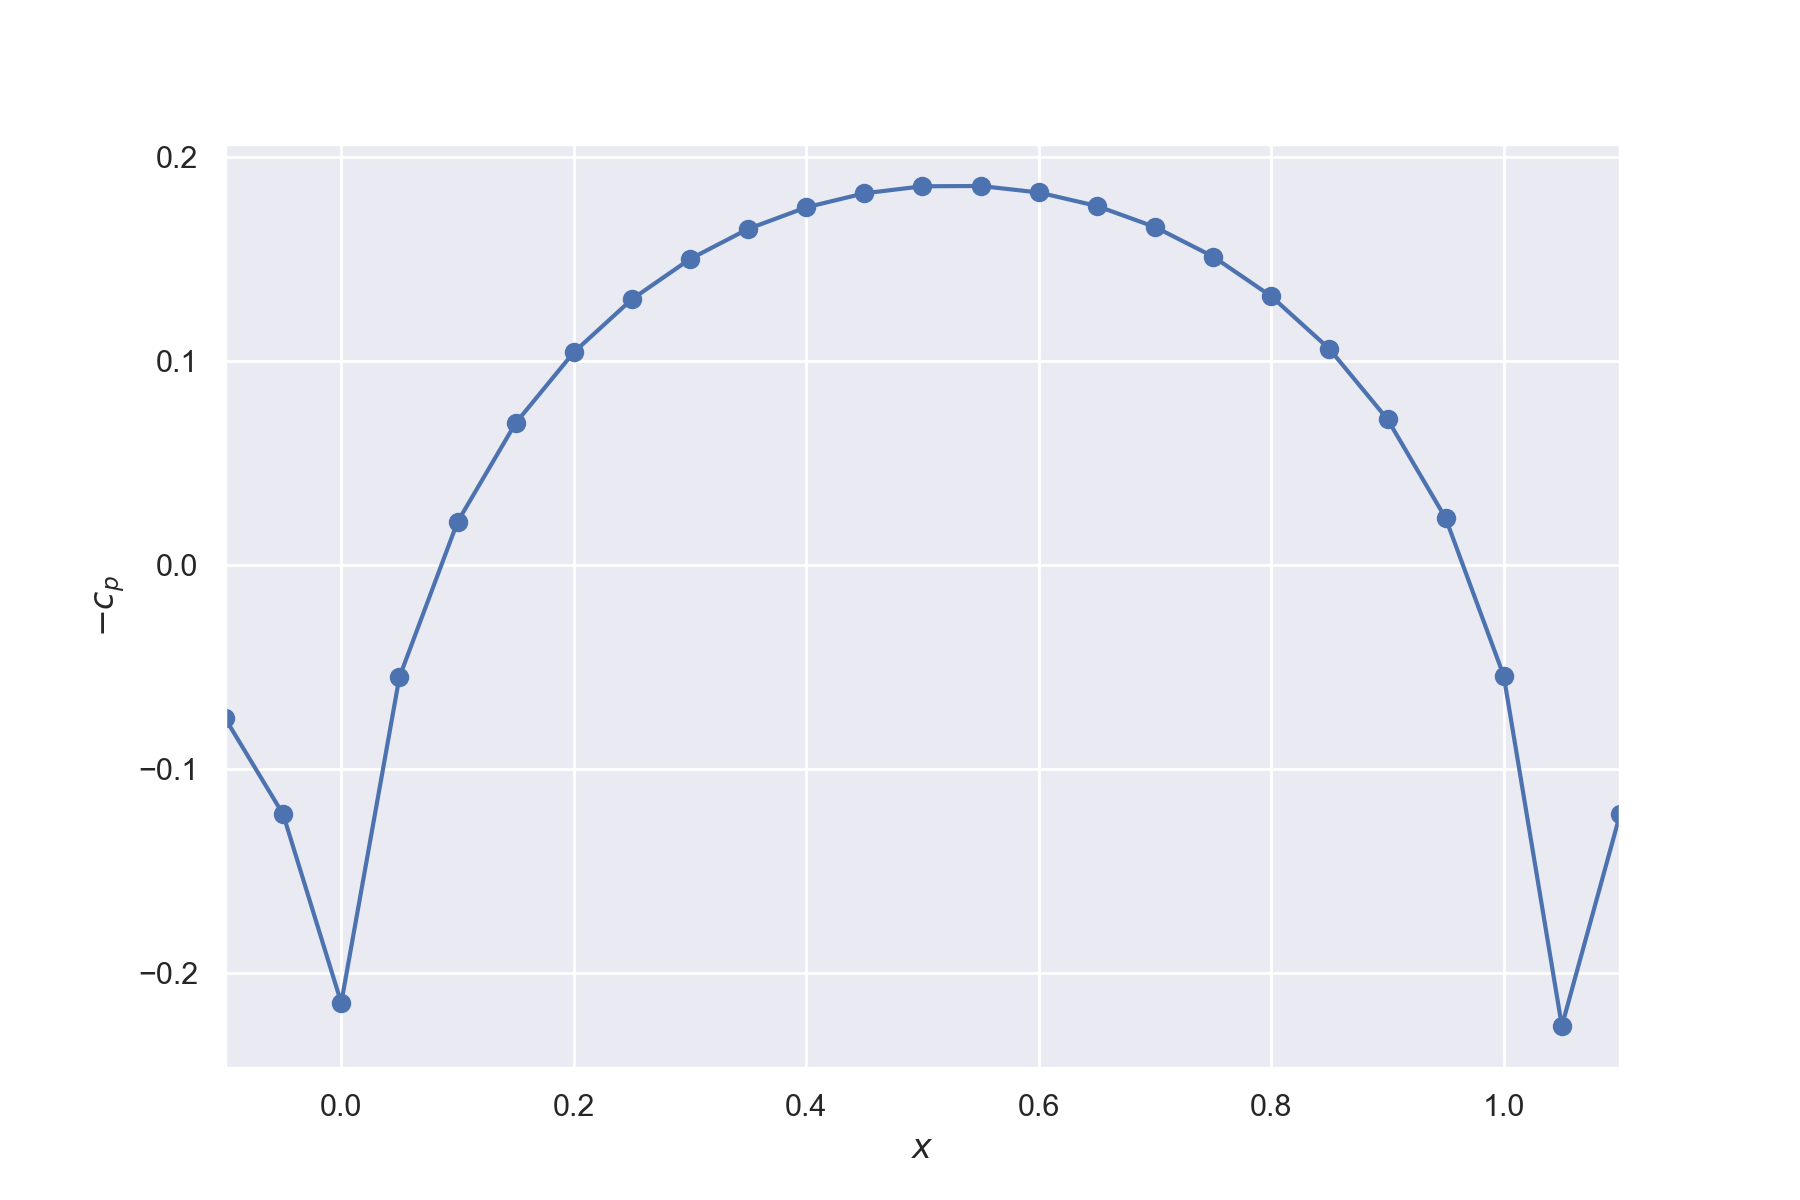

Text(0, 0.5, '$-c_p$')

In [6]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.plot(mesh.x, -flow.cp[:,2], marker='o')

ax.set_xlim((-0.1,1.1))
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$-c_p$', fontsize=12)

<IPython.core.display.Javascript object>


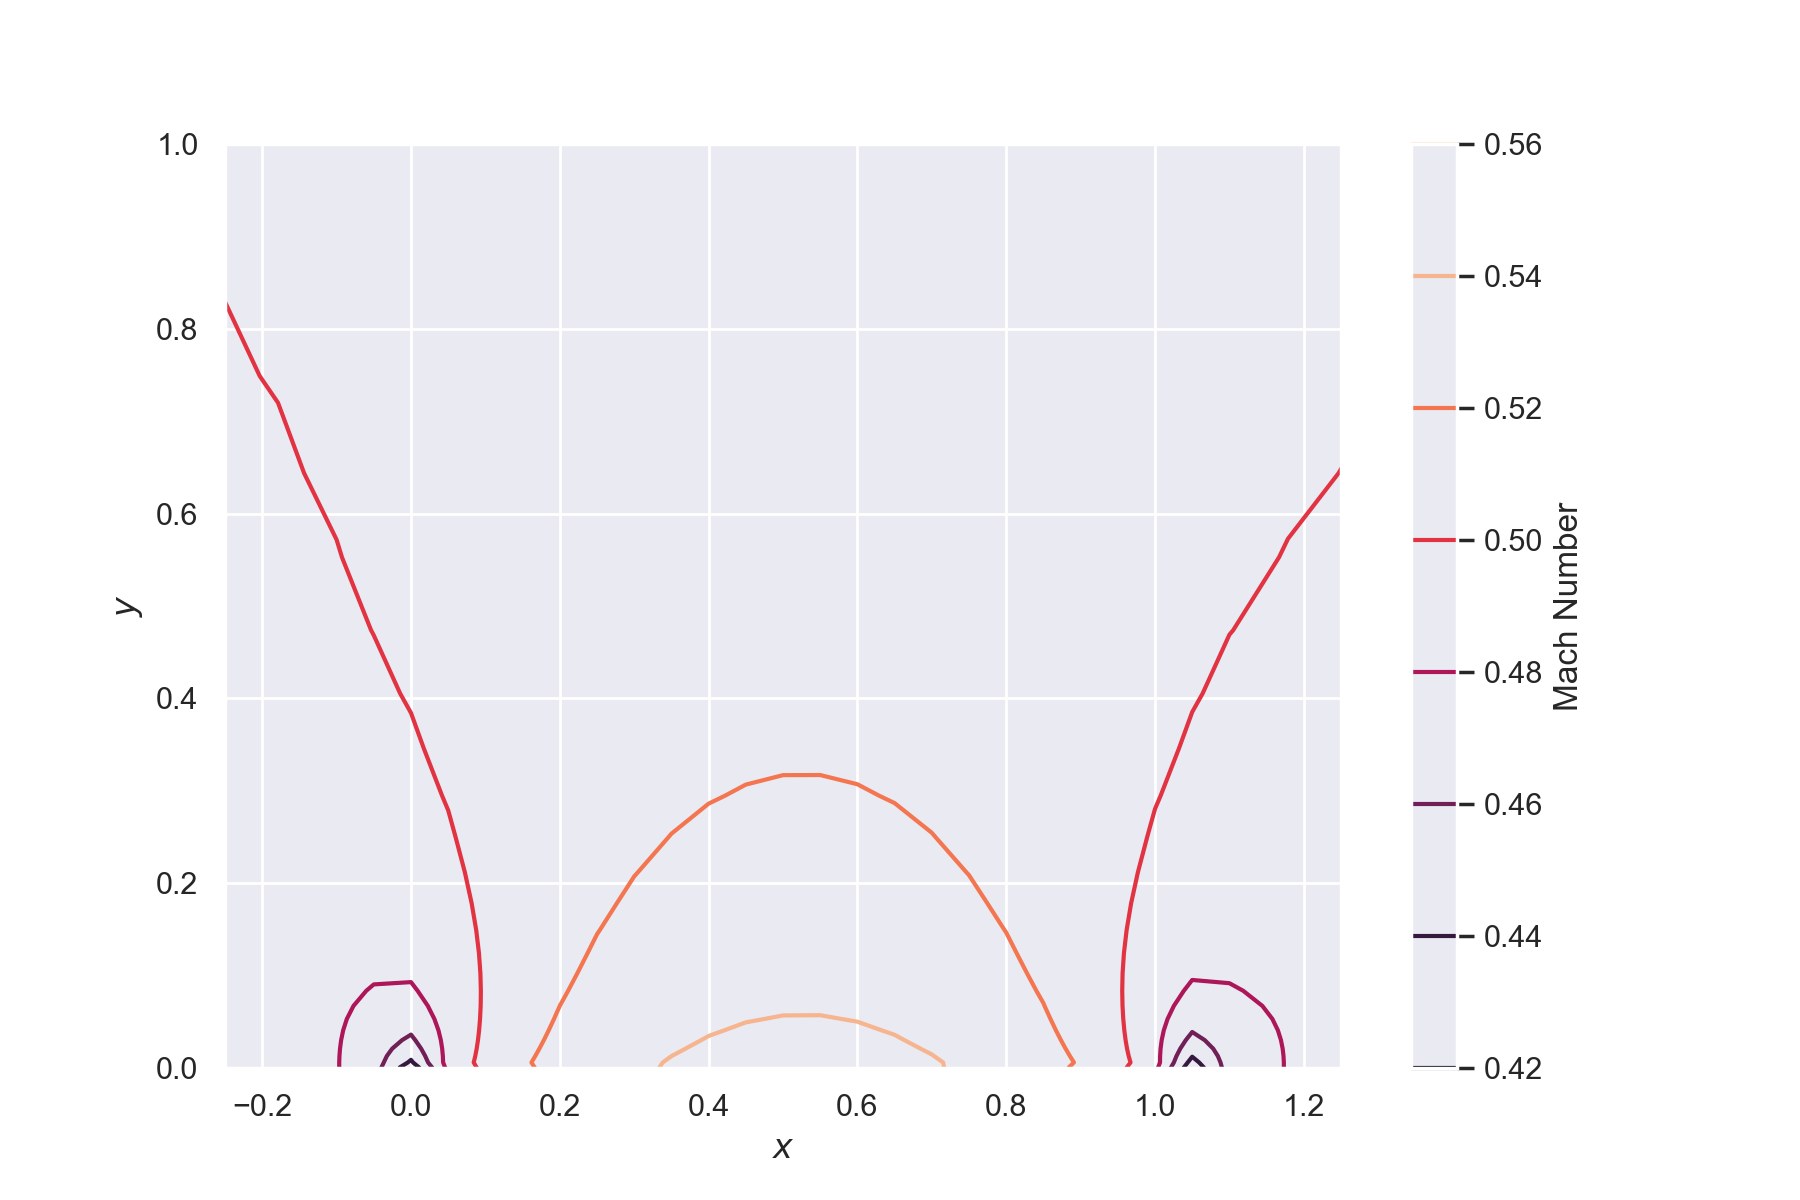

Text(0, 0.5, '$y$')

In [7]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

CS = plt.contour(flow.X, flow.Y, flow.M)#, levels=[0.8,  0.9, 1.0, 1.1, 1.2 ], colors=['y', 'b', 'r', 'g','k'])

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Mach Number')

ax.minorticks_on()

ax.set_xlim((-0.25,1.25))
ax.set_ylim((0,1))

ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)

<IPython.core.display.Javascript object>


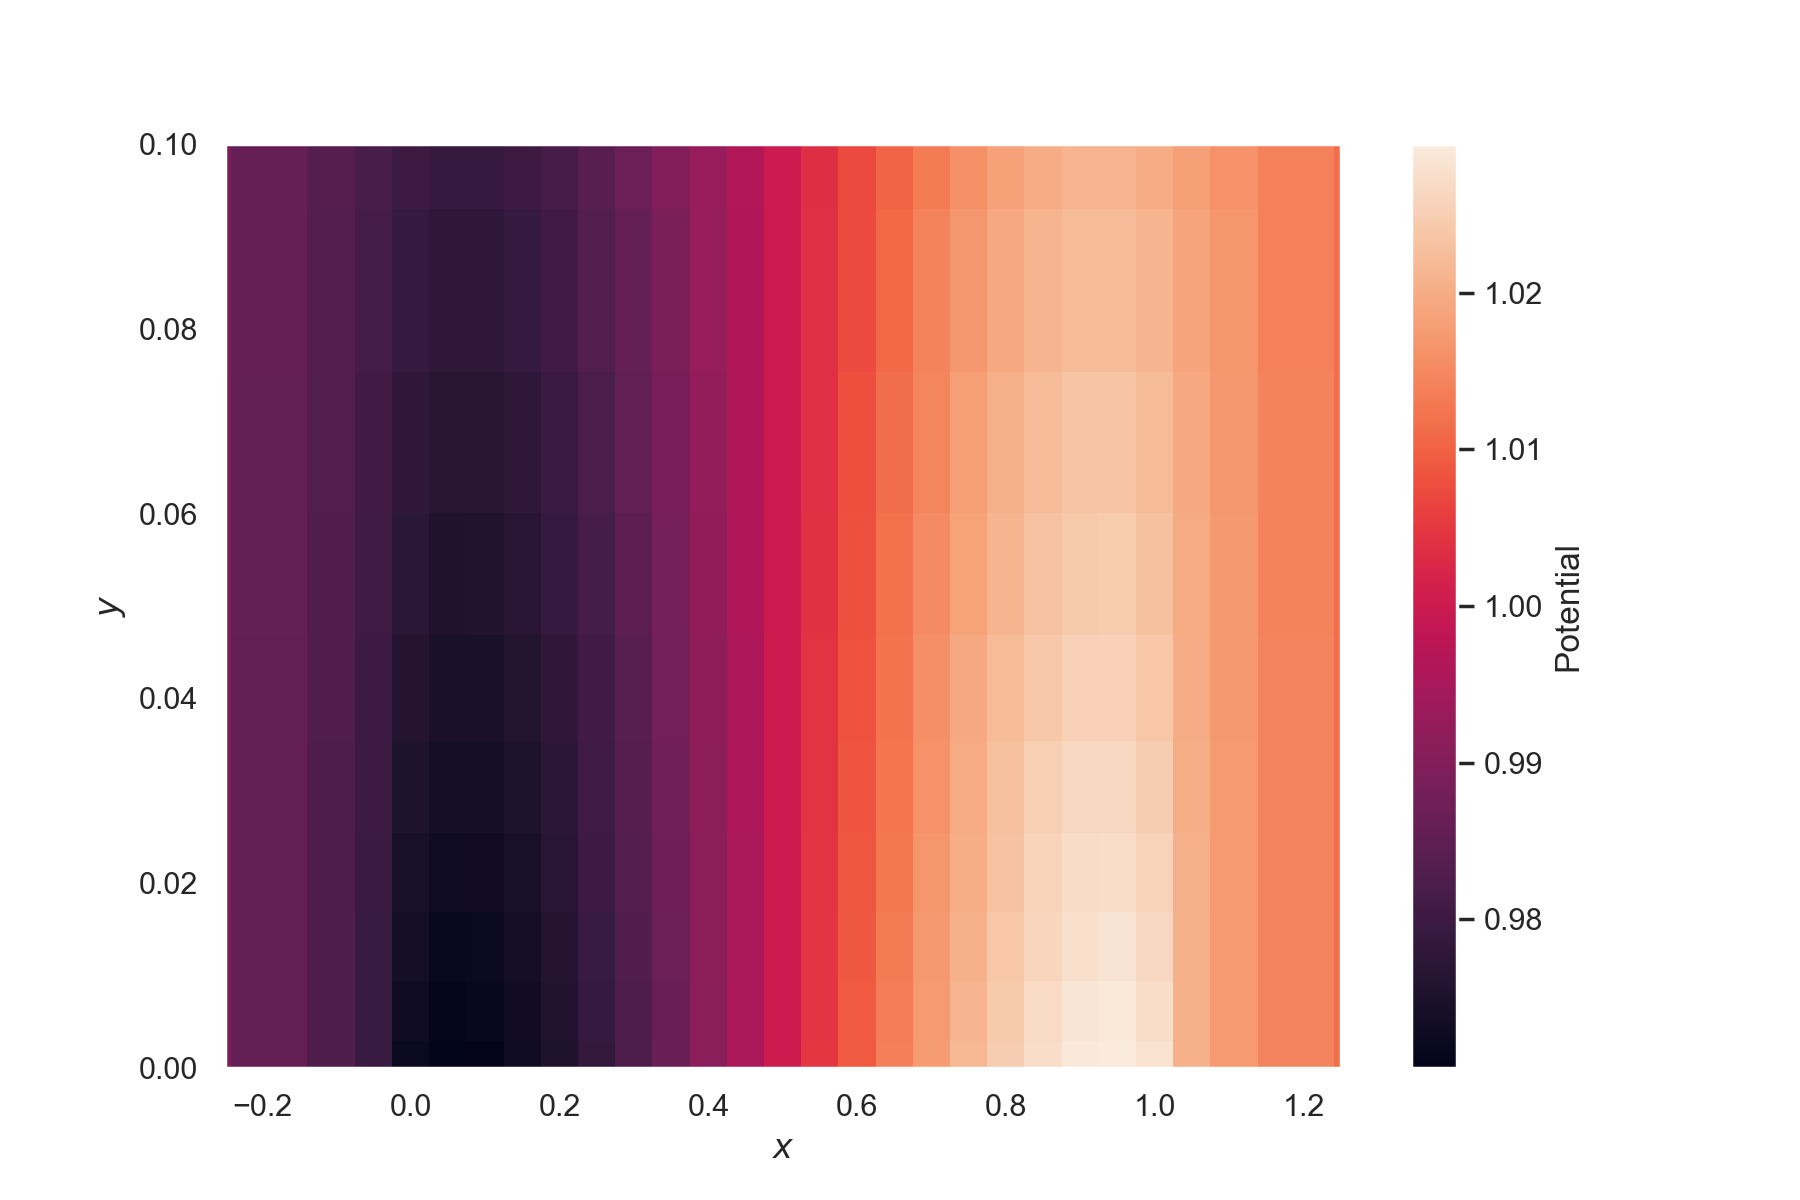

/var/folders/b_/pfp74yh957398t17tw7cby8h0000gr/T/ipykernel_91103/2767174129.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  CS = plt.pcolor(flow.X, flow.Y, flow.phi)
/var/folders/b_/pfp74yh957398t17tw7cby8h0000gr/T/ipykernel_91103/2767174129.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS)


Text(0, 0.5, '$y$')

In [8]:

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

CS = plt.pcolor(flow.X, flow.Y, flow.phi)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Potential')

ax.minorticks_on()

ax.set_xlim((-0.25,1.25))
ax.set_ylim((0,0.1))

ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)